In [1]:
from branches import *
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from time import time
import svgling.utils

Branches is an Optimal Decision Tree classifier that handles datasets with categorical features. In special cases, such as binary classification and binary features, Branches employs specialised techniques for micro-optimisation. This Tutorial illustrates how to use Branches in the general case and special cases where significant computational gains are made due to the specialised techniques.

# MONK 1

## General case: Classification with categorical features

In this first example, we consider the original Monk 1 dataset from the UCI repository.

In [2]:
data = np.genfromtxt('../data/monks-1.train', delimiter=' ', dtype=int)
data = data[:, :-1] # Getting rid of the last column, it contains only ids.
data = data[:, ::-1]

print(data.shape)

(124, 7)


We use an oridnal encoding of the dataset since it is the closest to the original dataset.

In [3]:
encoder = OrdinalEncoder()
encoder.fit(data)
data = encoder.transform(data).astype(int)

In this general case, we use Branches without specifying the encoding parameter, it is set to 'ordinal' by default.

In [4]:
lambd = 0.01
alg = Branches(data)

In [5]:
start_time = time()
alg.solve(lambd, print_iter=1000)
print('Execution time : %.4f' %(time() - start_time))

The search finished after 64 iterations.
Execution time : 0.0222


In [6]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits :', splits)
print('Accuracy :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 27
Number of splits : 10
Accuracy : 1.0


The next cell allows the visualisation of the Optimal Decision Tree solution. Please note that while using JupyterLab for instance, you should enable a Light theme instead of a Dark one to visualise the solution in a better contrast. This can be set via Settings -> Theme -> JupyterLab Light. Note that the default renderer in Jupyter is svging, thus if the code below does not render the Decision Tree, please try running ```svgling.draw_tree(tree)``` instead.

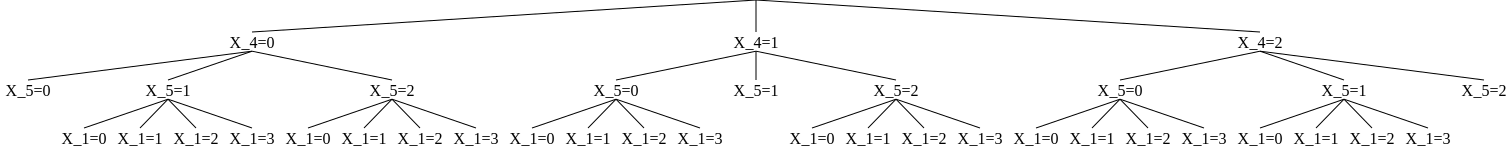

In [7]:
tree = alg.plot_tree(show_classes=False)
tree

To save this tree figure, we use the svgling package as shown below.

In [8]:
svgling.draw_tree(tree).saveas("../trees/monk1-o-no_classes.svg", pretty=True)

The figure above only includes the tree structure without the predicted classes. To show the predicted classes, set ```show_classes=True``` in the plot_tree method.

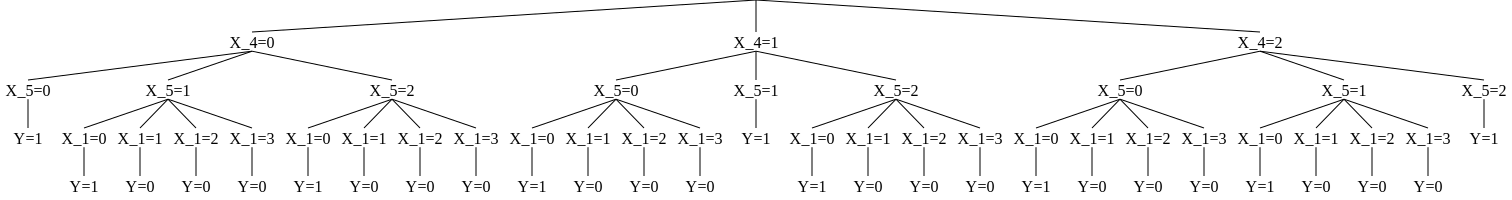

In [9]:
tree = alg.plot_tree(show_classes=True)
tree

Notice that many branches, such as (X_4=0, X_5=1) and (X_4=0, X_5=2) have the same subtree rooted at them. We can further compactify the tree representation by setting ```compact=True``` in the plot_tree method.

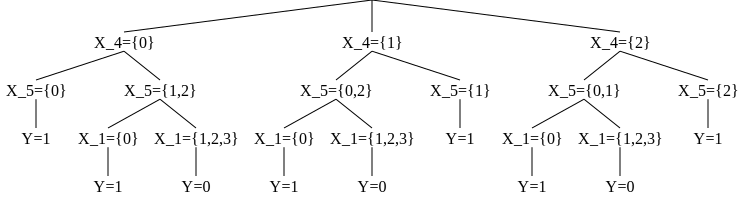

In [10]:
tree = alg.plot_tree(show_classes=True, compact=True)
tree

The following cell clears the memo.

In [11]:
alg.reinitialise()

## Special case: Binary Classification with binary featrues.

In this second example, we use scikit-learn's OneHotEncoder to encode the monk1 dataset in binary form.

In [2]:
data = np.genfromtxt('../data/monks-1.train', delimiter=' ', dtype=int)
data = data[:, :-1] # Getting rid of the last column, it contains only ids.

# Place the first column last.
data_ = np.empty_like(data)
data_[:, :-1], data_[:, -1] = data[:, 1:], data[:, 0]
data = data_

print('Training data shape         :', data.shape)

X, y = data[:, :-1], data[:, -1]

encoder_X, encoder_y = OneHotEncoder(drop=None, sparse_output=False), LabelEncoder()
encoder_X.fit(X)
encoder_y.fit(y)
X, y = encoder_X.transform(X).astype(int), encoder_y.transform(y)

data = np.hstack((X, y.reshape(-1, 1)))
print('Encoded Training data shape :', data.shape)

Training data shape         : (124, 7)
Encoded Training data shape : (124, 18)


When applying Branches to a binary classifiction problem with binary features, we specify parameter ```encoding='binary'``` to benefit from significant computational speedups.

In [3]:
lambd = 0.01
encoding = 'binary'
alg = Branches(data, encoding=encoding)

In [4]:
start_time = time()
alg.solve(lambd, print_iter=10000)
print('Execution time : %.4f' %(time() - start_time))

The search finished after 146 iterations.
Execution time : 0.1455


In [5]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits   :', splits)
print('Accuracy           :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 7
Number of splits   : 6
Accuracy           : 1.0


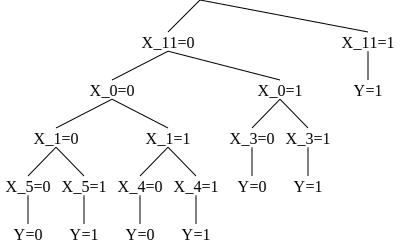

In [6]:
tree = alg.plot_tree()
tree

In [7]:
alg.reinitialise()

# Car Evaluation

## Special case: Classification with Binary features

In this last example, we consider a multiclass classification problem with binary features. For this, we use the Car Evaluation dataset from the UCI repository that we encode with scikit-learn's OneHoteEncoder.

In [2]:
data = np.genfromtxt('../data/car.data', delimiter=',', dtype=str)
X, y = data[:, :-1], data[:, -1]
print('Number of classes          :', len(set(y)))
print('Data shape before encoding :', data.shape)

encoder_X, encoder_y = OneHotEncoder(drop=None, sparse_output=False), LabelEncoder()
encoder_X.fit(X)
encoder_y.fit(y)
X = encoder_X.transform(X).astype(int)
y = encoder_y.transform(y)

data = np.hstack((X, y.reshape(-1, 1)))
print('Data shape after encoding  :', data.shape)

Number of classes          : 4
Data shape before encoding : (1728, 7)
Data shape after encoding  : (1728, 22)


When applying Branches to a multiclass classifiction problem with binary features, we specify parameter ```encoding='multi'``` to benefit from significant computational speedups.

In [3]:
lambd = 0.005
time_limit = 300
encoding = 'multi'

In [4]:
alg = Branches(data, encoding=encoding)
start_time = time()
alg.solve(lambd, n=5000000, print_iter=10000, time_limit=time_limit)
print('Execution time : %.4f' %(time() - start_time))

Iteration 10000
Iteration 20000
Iteration 30000
Iteration 40000
Iteration 50000
Iteration 60000
Iteration 70000
Iteration 80000
Iteration 90000
Iteration 100000
Iteration 110000
Iteration 120000
Iteration 130000
Iteration 140000
Iteration 150000
Iteration 160000
Iteration 170000
Iteration 180000
Iteration 190000
Iteration 200000
Iteration 210000
Iteration 220000
Iteration 230000
Iteration 240000
Iteration 250000
Iteration 260000
Iteration 270000
Iteration 280000
Iteration 290000
Iteration 300000
Iteration 310000
Iteration 320000
Iteration 330000
Iteration 340000
Iteration 350000
Iteration 360000
Iteration 370000
Iteration 380000
Iteration 390000
Iteration 400000
Iteration 410000
Iteration 420000
Iteration 430000
Iteration 440000
Iteration 450000
The search finished after 456452 iterations.
Execution time : 242.5986


In [5]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits :', splits)
print('Accuracy :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 16
Number of splits : 15
Accuracy : 0.9276620370370371


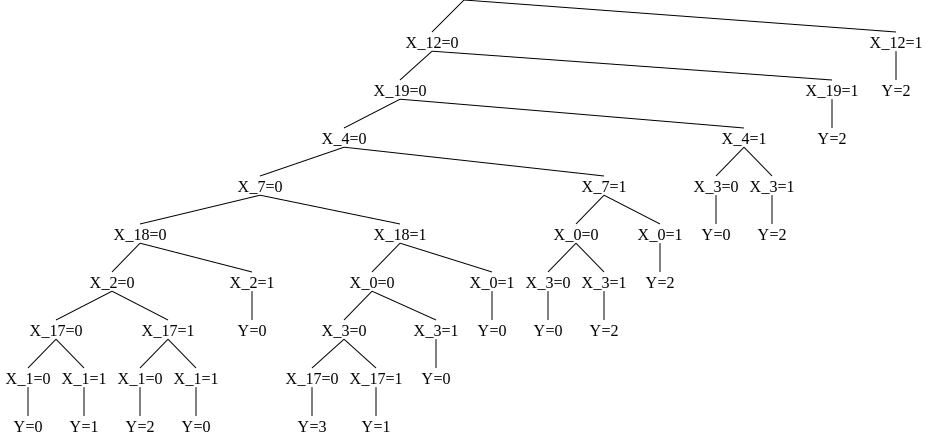

In [6]:
tree = alg.plot_tree()
tree

In [7]:
alg.reinitialise()